In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
import numpy as np

## First read in weather data from csv file.

In [2]:
df_weather = pd.read_csv('weather_data/Weather.csv')

## Keep only the columns that we need

In [3]:
df_weather = df_weather.drop(columns=['tempi', 'dewpti', 'wspdm', 'wgustm', 'wgusti', 'wdird', 'wdire', 'vism',
                          'pressurei', 'windchillm', 'windchilli', 'heatindexm', 'heatindexi', 'precipi', 'icon'])

In [4]:
df_weather.head()

,pickup_datetime,tempm,dewptm,hum,wspdi,visi,pressurem,precipm,conds,fog,rain,snow,hail,thunder,tornado
0,2015-12-31 00:15:00,7.8,6.1,89.0,4.6,2.5,1018.2,0.5,Light Rain,0,1,0,0,0,0
1,2015-12-31 00:42:00,7.8,6.1,89.0,4.6,4.0,1017.8,0.8,Overcast,0,0,0,0,0,0
2,2015-12-31 00:51:00,7.8,6.1,89.0,3.5,5.0,1017.0,0.8,Overcast,0,0,0,0,0,0
3,2015-12-31 01:51:00,7.2,5.6,90.0,4.6,8.0,1016.5,0.3,Overcast,0,0,0,0,0,0
4,2015-12-31 02:51:00,7.2,5.6,90.0,0.0,8.0,1016.7,NaN,Overcast,0,0,0,0,0,0


In [5]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10481 entries, 0 to 10480
Data columns (total 15 columns):
pickup_datetime    10481 non-null object
tempm              10476 non-null float64
dewptm             10476 non-null float64
hum                10476 non-null float64
wspdi              9744 non-null float64
visi               10236 non-null float64
pressurem          10242 non-null float64
precipm            1706 non-null float64
conds              10481 non-null object
fog                10481 non-null int64
rain               10481 non-null int64
snow               10481 non-null int64
hail               10481 non-null int64
thunder            10481 non-null int64
tornado            10481 non-null int64
dtypes: float64(7), int64(6), object(2)
memory usage: 1.2+ MB


In [6]:
#check if snow and rain happen on the same days
len(df_weather[(df_weather.rain == 1) & (df_weather.snow == 1)])

0

### Manage null values

In [7]:
df_weather[df_weather.tempm.isnull() == True]

,pickup_datetime,tempm,dewptm,hum,wspdi,visi,pressurem,precipm,conds,fog,rain,snow,hail,thunder,tornado
2847,2016-04-04 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,0,0,0,0,0,0
3241,2016-04-19 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,0,0,0,0,0,0
3643,2016-05-04 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,0,0,0,0,0,0
5520,2016-07-11 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,0,0,0,0,0,0
8850,2016-11-04 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,0,0,0,0,0,0


In [8]:
df_weather[df_weather.dewptm.isnull() == True]

,pickup_datetime,tempm,dewptm,hum,wspdi,visi,pressurem,precipm,conds,fog,rain,snow,hail,thunder,tornado
2847,2016-04-04 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,0,0,0,0,0,0
3241,2016-04-19 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,0,0,0,0,0,0
3643,2016-05-04 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,0,0,0,0,0,0
5520,2016-07-11 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,0,0,0,0,0,0
8850,2016-11-04 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,0,0,0,0,0,0


In [9]:
df_weather[df_weather.hum.isnull() == True]

,pickup_datetime,tempm,dewptm,hum,wspdi,visi,pressurem,precipm,conds,fog,rain,snow,hail,thunder,tornado
2847,2016-04-04 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,0,0,0,0,0,0
3241,2016-04-19 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,0,0,0,0,0,0
3643,2016-05-04 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,0,0,0,0,0,0
5520,2016-07-11 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,0,0,0,0,0,0
8850,2016-11-04 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,0,0,0,0,0,0


In [10]:
df_weather[3240:3245]

,pickup_datetime,tempm,dewptm,hum,wspdi,visi,pressurem,precipm,conds,fog,rain,snow,hail,thunder,tornado
3240,2016-04-19 06:51:00,17.8,0.0,30.0,6.9,10.0,1013.8,NaN,Mostly Cloudy,0,0,0,0,0,0
3241,2016-04-19 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,0,0,0,0,0,0
3242,2016-04-19 07:51:00,18.3,1.1,32.0,5.8,10.0,1014.5,NaN,Clear,0,0,0,0,0,0
3243,2016-04-19 08:51:00,18.9,4.4,38.0,NaN,10.0,1014.7,NaN,Clear,0,0,0,0,0,0
3244,2016-04-19 10:51:00,20.0,5.0,37.0,9.2,10.0,1015.2,NaN,Partly Cloudy,0,0,0,0,0,0


### The missing values for tempm, dewptm, and hum all happen at the same instances.  Let's take the average of the values before and after the nan value.

In [11]:
df_weather['tempm'] = (df_weather.tempm.ffill() + df_weather.tempm.bfill())/2
df_weather['dewptm'] = (df_weather.dewptm.ffill() + df_weather.dewptm.bfill())/2
df_weather['hum'] = (df_weather.hum.ffill() + df_weather.hum.bfill())/2

In [12]:
df_weather[3240:3245]

,pickup_datetime,tempm,dewptm,hum,wspdi,visi,pressurem,precipm,conds,fog,rain,snow,hail,thunder,tornado
3240,2016-04-19 06:51:00,17.80,0.00,30.0,6.9,10.0,1013.8,NaN,Mostly Cloudy,0,0,0,0,0,0
3241,2016-04-19 07:00:00,18.05,0.55,31.0,NaN,NaN,NaN,NaN,Unknown,0,0,0,0,0,0
3242,2016-04-19 07:51:00,18.30,1.10,32.0,5.8,10.0,1014.5,NaN,Clear,0,0,0,0,0,0
3243,2016-04-19 08:51:00,18.90,4.40,38.0,NaN,10.0,1014.7,NaN,Clear,0,0,0,0,0,0
3244,2016-04-19 10:51:00,20.00,5.00,37.0,9.2,10.0,1015.2,NaN,Partly Cloudy,0,0,0,0,0,0


In [13]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10481 entries, 0 to 10480
Data columns (total 15 columns):
pickup_datetime    10481 non-null object
tempm              10481 non-null float64
dewptm             10481 non-null float64
hum                10481 non-null float64
wspdi              9744 non-null float64
visi               10236 non-null float64
pressurem          10242 non-null float64
precipm            1706 non-null float64
conds              10481 non-null object
fog                10481 non-null int64
rain               10481 non-null int64
snow               10481 non-null int64
hail               10481 non-null int64
thunder            10481 non-null int64
tornado            10481 non-null int64
dtypes: float64(7), int64(6), object(2)
memory usage: 1.2+ MB


In [14]:
df_weather.wspdi.describe()

count    9744.000000
mean        5.410324
std         3.925301
min         0.000000
25%         3.500000
50%         4.600000
75%         8.100000
max        85.200000
Name: wspdi, dtype: float64

In [15]:
df_weather[df_weather.wspdi.isnull() == True].head(10)

,pickup_datetime,tempm,dewptm,hum,wspdi,visi,pressurem,precipm,conds,fog,rain,snow,hail,thunder,tornado
22,2015-12-31 14:51:00,8.9,0.6,56.0,NaN,10.0,1016.7,NaN,Overcast,0,0,0,0,0,0
29,2015-12-31 21:51:00,6.1,-3.3,51.0,NaN,10.0,1019.0,NaN,Overcast,0,0,0,0,0,0
47,2016-01-01 15:51:00,3.9,-6.7,46.0,NaN,10.0,1014.9,NaN,Overcast,0,0,0,0,0,0
53,2016-01-01 21:51:00,1.7,-6.7,54.0,NaN,10.0,1016.6,NaN,Clear,0,0,0,0,0,0
67,2016-01-02 11:51:00,13.9,3.3,49.0,NaN,10.0,1009.2,NaN,Clear,0,0,0,0,0,0
99,2016-01-03 19:51:00,7.8,1.7,66.0,NaN,10.0,1011.9,NaN,Overcast,0,0,0,0,0,0
123,2016-01-04 22:51:00,21.0,10.0,49.0,NaN,10.0,1003.1,NaN,Mostly Cloudy,0,0,0,0,0,0
126,2016-01-05 01:51:00,10.0,2.8,61.0,NaN,10.0,1023.0,NaN,Clear,0,0,0,0,0,0
141,2016-01-05 12:51:00,8.3,6.1,86.0,NaN,7.0,1021.7,0.8,Light Rain,0,1,0,0,0,0
182,2016-01-06 18:51:00,24.4,12.2,46.0,NaN,8.0,1019.1,NaN,Clear,0,0,0,0,0,0


In [16]:
df_weather[122:128]

,pickup_datetime,tempm,dewptm,hum,wspdi,visi,pressurem,precipm,conds,fog,rain,snow,hail,thunder,tornado
122,2016-01-04 21:51:00,20.6,13.3,63.0,3.5,10.0,1001.9,NaN,Scattered Clouds,0,0,0,0,0,0
123,2016-01-04 22:51:00,21.0,10.0,49.0,NaN,10.0,1003.1,NaN,Mostly Cloudy,0,0,0,0,0,0
124,2016-01-04 23:51:00,16.7,6.1,50.0,0.0,10.0,1003.7,NaN,Mostly Cloudy,0,0,0,0,0,0
125,2016-01-05 00:51:00,10.0,0.0,50.0,3.5,10.0,1023.7,NaN,Clear,0,0,0,0,0,0
126,2016-01-05 01:51:00,10.0,2.8,61.0,NaN,10.0,1023.0,NaN,Clear,0,0,0,0,0,0
127,2016-01-05 02:51:00,10.0,0.6,52.0,5.8,10.0,1022.4,NaN,Mostly Cloudy,0,0,0,0,0,0


### Since some of the wspdi values are already 0, it doesn't make sense to fill in the nan values with 0.  Use forward fill instead.

In [17]:
df_weather.wspdi.ffill(inplace = True)

In [18]:
df_weather[122:125]

,pickup_datetime,tempm,dewptm,hum,wspdi,visi,pressurem,precipm,conds,fog,rain,snow,hail,thunder,tornado
122,2016-01-04 21:51:00,20.6,13.3,63.0,3.5,10.0,1001.9,NaN,Scattered Clouds,0,0,0,0,0,0
123,2016-01-04 22:51:00,21.0,10.0,49.0,3.5,10.0,1003.1,NaN,Mostly Cloudy,0,0,0,0,0,0
124,2016-01-04 23:51:00,16.7,6.1,50.0,0.0,10.0,1003.7,NaN,Mostly Cloudy,0,0,0,0,0,0


In [19]:
df_weather.visi.count()

10236

In [20]:
df_weather[df_weather.visi.isnull() == True].tail()

,pickup_datetime,tempm,dewptm,hum,wspdi,visi,pressurem,precipm,conds,fog,rain,snow,hail,thunder,tornado
7308,2016-09-12 11:51:00,4.00,-7.00,45.0,6.9,NaN,NaN,NaN,Unknown,0,0,0,0,0,0
7309,2016-09-12 12:51:00,5.00,-7.00,42.0,6.9,NaN,NaN,NaN,Unknown,0,0,0,0,0,0
7310,2016-09-12 13:51:00,4.00,-10.00,36.0,6.9,NaN,NaN,NaN,Unknown,0,0,0,0,0,0
8850,2016-11-04 07:00:00,8.05,1.15,62.0,6.9,NaN,NaN,NaN,Unknown,0,0,0,0,0,0
9048,2016-11-12 00:52:00,-1.70,-8.90,58.0,0.0,NaN,1031.5,NaN,Unknown,0,0,0,0,0,0


In [21]:
df_weather[7295:7300]

,pickup_datetime,tempm,dewptm,hum,wspdi,visi,pressurem,precipm,conds,fog,rain,snow,hail,thunder,tornado
7295,2016-09-11 22:51:00,10.0,5.6,74.0,4.6,10.0,1013.7,NaN,Overcast,0,0,0,0,0,0
7296,2016-09-11 23:51:00,9.4,5.0,74.0,6.9,10.0,1013.9,NaN,Overcast,0,0,0,0,0,0
7297,2016-09-12 00:51:00,2.0,-9.0,44.0,6.9,NaN,NaN,NaN,Unknown,0,0,0,0,0,0
7298,2016-09-12 01:51:00,1.0,-9.0,48.0,6.9,NaN,NaN,NaN,Unknown,0,0,0,0,0,0
7299,2016-09-12 02:51:00,1.0,-9.0,48.0,6.9,NaN,NaN,NaN,Unknown,0,0,0,0,0,0


In [22]:
df_weather.visi.ffill(inplace = True)

In [23]:
df_weather[7297:7298]

,pickup_datetime,tempm,dewptm,hum,wspdi,visi,pressurem,precipm,conds,fog,rain,snow,hail,thunder,tornado
7297,2016-09-12 00:51:00,2.0,-9.0,44.0,6.9,10.0,NaN,NaN,Unknown,0,0,0,0,0,0


In [24]:
df_weather[df_weather.pressurem.isnull() == True].head()

,pickup_datetime,tempm,dewptm,hum,wspdi,visi,pressurem,precipm,conds,fog,rain,snow,hail,thunder,tornado
2847,2016-04-04 09:00:00,4.15,0.85,79.0,5.8,10.0,NaN,NaN,Unknown,0,0,0,0,0,0
3241,2016-04-19 07:00:00,18.05,0.55,31.0,6.9,10.0,NaN,NaN,Unknown,0,0,0,0,0,0
3643,2016-05-04 06:00:00,-3.05,-11.95,51.0,6.9,10.0,NaN,NaN,Unknown,0,0,0,0,0,0
3922,2016-05-13 00:59:00,14.40,9.40,72.0,4.6,10.0,NaN,NaN,Unknown,0,0,0,0,0,0
3923,2016-05-13 02:00:00,14.00,10.00,77.0,4.6,10.0,NaN,NaN,Unknown,0,0,0,0,0,0


In [25]:
df_weather[3240:3245]

,pickup_datetime,tempm,dewptm,hum,wspdi,visi,pressurem,precipm,conds,fog,rain,snow,hail,thunder,tornado
3240,2016-04-19 06:51:00,17.80,0.00,30.0,6.9,10.0,1013.8,NaN,Mostly Cloudy,0,0,0,0,0,0
3241,2016-04-19 07:00:00,18.05,0.55,31.0,6.9,10.0,NaN,NaN,Unknown,0,0,0,0,0,0
3242,2016-04-19 07:51:00,18.30,1.10,32.0,5.8,10.0,1014.5,NaN,Clear,0,0,0,0,0,0
3243,2016-04-19 08:51:00,18.90,4.40,38.0,5.8,10.0,1014.7,NaN,Clear,0,0,0,0,0,0
3244,2016-04-19 10:51:00,20.00,5.00,37.0,9.2,10.0,1015.2,NaN,Partly Cloudy,0,0,0,0,0,0


In [26]:
df_weather.pressurem.ffill(inplace = True)

In [27]:
df_weather[df_weather.precipm.isnull() == False].head(15)

,pickup_datetime,tempm,dewptm,hum,wspdi,visi,pressurem,precipm,conds,fog,rain,snow,hail,thunder,tornado
0,2015-12-31 00:15:00,7.8,6.1,89.0,4.6,2.5,1018.2,0.5,Light Rain,0,1,0,0,0,0
1,2015-12-31 00:42:00,7.8,6.1,89.0,4.6,4.0,1017.8,0.8,Overcast,0,0,0,0,0,0
2,2015-12-31 00:51:00,7.8,6.1,89.0,3.5,5.0,1017.0,0.8,Overcast,0,0,0,0,0,0
3,2015-12-31 01:51:00,7.2,5.6,90.0,4.6,8.0,1016.5,0.3,Overcast,0,0,0,0,0,0
69,2016-01-02 13:51:00,14.4,3.9,49.0,6.9,10.0,1009.1,0.0,Overcast,0,0,0,0,0,0
70,2016-01-02 14:51:00,13.3,2.8,49.0,3.5,10.0,1010.0,0.0,Overcast,0,0,0,0,0,0
71,2016-01-02 15:51:00,11.7,1.1,48.0,6.9,5.0,1011.3,0.0,Light Rain,0,1,0,0,0,0
72,2016-01-02 16:51:00,11.1,0.0,47.0,3.5,10.0,1011.6,0.3,Overcast,0,0,0,0,0,0
75,2016-01-02 19:51:00,10.0,-2.2,43.0,6.9,10.0,1014.9,0.0,Scattered Clouds,0,0,0,0,0,0
119,2016-01-04 18:51:00,21.7,13.3,59.0,0.0,8.0,999.0,0.0,Light Rain,0,1,0,0,0,0


### The precipitation readings seem to occur in bunches, so it doesn't make sense to forward fill especially when it occurs so rarely.  Let's simply replace the nan values with 0.  Basically interpreting a nan value reading of precipitation as having no precipitation.

In [28]:
df_weather.precipm.fillna(0, inplace = True)

### All the null values have been filled in

## Convert the pickup_datetime string to a datetime object

In [29]:
df_weather['pickup_datetime'] = pd.to_datetime(df_weather['pickup_datetime'])

## Reset the index 

In [30]:
df_weather = df_weather.reset_index(drop = True)

In [31]:
df_weather.head()

,pickup_datetime,tempm,dewptm,hum,wspdi,visi,pressurem,precipm,conds,fog,rain,snow,hail,thunder,tornado
0,2015-12-31 00:15:00,7.8,6.1,89.0,4.6,2.5,1018.2,0.5,Light Rain,0,1,0,0,0,0
1,2015-12-31 00:42:00,7.8,6.1,89.0,4.6,4.0,1017.8,0.8,Overcast,0,0,0,0,0,0
2,2015-12-31 00:51:00,7.8,6.1,89.0,3.5,5.0,1017.0,0.8,Overcast,0,0,0,0,0,0
3,2015-12-31 01:51:00,7.2,5.6,90.0,4.6,8.0,1016.5,0.3,Overcast,0,0,0,0,0,0
4,2015-12-31 02:51:00,7.2,5.6,90.0,0.0,8.0,1016.7,0.0,Overcast,0,0,0,0,0,0


## Explore the data further, looking at the rain/snow for different days

In [32]:
df_weather_grouped = df_weather.groupby([df_weather.pickup_datetime.dt.month, df_weather.pickup_datetime.dt.day])

In [33]:
#create a dataframe of how many measurements of each instance were taken
#one column for rain, one for snow, one for nothing
weatherdate = []
raincount = []
snowcount = []
count = []

#iterate through each day as grouped in df_weather_grouped, adding up the instances of rain, snow, and clear
for month, day in df_weather_grouped:
    weatherdate.append(month)
    rain_total = df_weather_grouped.get_group(month).rain.sum()
    snow_total = df_weather_grouped.get_group(month).snow.sum()
    clear_total = len(df_weather_grouped.get_group(month)) - rain_total - snow_total
    
    raincount.append(df_weather_grouped.get_group(month).rain.sum())
    snowcount.append(df_weather_grouped.get_group(month).snow.sum())
    count.append(clear_total)
    
    

In [34]:
df_precip_type = pd.DataFrame({'date':weatherdate,'rain':raincount, 'snow':snowcount, 'clear':count})

In [35]:
df_precip_type.head()

,date,rain,snow,clear
0,"(1, 1)",0,0,24
1,"(1, 2)",1,0,23
2,"(1, 3)",0,0,26
3,"(1, 4)",1,0,18
4,"(1, 5)",11,0,28


## Look at the days that it rained

In [36]:
df_rain = df_precip_type[df_precip_type['rain'] != 0]

In [37]:
df_rain_sorted = df_rain.sort_values(by = ['rain'], ascending = False)

In [38]:
df_rain_sorted.head(10)

,date,rain,snow,clear
333,"(11, 29)",40,0,14
54,"(2, 24)",36,0,35
300,"(10, 27)",33,0,16
64,"(3, 5)",33,0,22
319,"(11, 15)",28,0,22
274,"(10, 1)",28,0,18
334,"(11, 30)",27,0,20
210,"(7, 29)",26,0,21
294,"(10, 21)",25,0,38
211,"(7, 30)",24,0,23


## Look at the days that it snowed

In [39]:
df_snow = df_precip_type[df_precip_type['snow'] != 0]

In [40]:
df_snow_sorted = df_snow.sort_values(by = ['snow'], ascending = False)

In [41]:
df_snow_sorted.head(10)

,date,rain,snow,clear
22,"(1, 23)",0,44,1
93,"(4, 3)",0,35,21
122,"(5, 2)",1,24,19
80,"(3, 21)",0,21,20
79,"(3, 20)",0,17,20
214,"(8, 2)",0,15,29
351,"(12, 17)",5,14,22
45,"(2, 15)",11,12,23
275,"(10, 2)",0,8,36
16,"(1, 17)",0,7,27


Something here does not look right.  According to this table, it snowed on May 2, and August 2, which does not make sense.  I suspect that the days and months have be reversed for some of the datetimes

## Look at the days with neither rain or snow, ie clear

In [42]:
df_clear = df_precip_type[(df_precip_type['rain'] == 0) & (df_precip_type['snow'] == 0)]

In [43]:
df_clear_sorted = df_clear.sort_values(by = ['clear'], ascending = False)

In [44]:
df_clear_sorted.head(10)

,date,rain,snow,clear
37,"(2, 7)",0,0,71
186,"(7, 5)",0,0,43
69,"(3, 10)",0,0,37
280,"(10, 7)",0,0,35
190,"(7, 9)",0,0,35
125,"(5, 5)",0,0,34
243,"(8, 31)",0,0,33
361,"(12, 27)",0,0,31
301,"(10, 28)",0,0,31
83,"(3, 24)",0,0,31


Since some of the snow days don't make sense, let's take a look at the daily temperatures for each month to get a better sense of what is going on with our data.

In [45]:
#plot the daily average temperature for each month
def weatherplot(data):
    #group the data by month
    weather_bymonth = data.groupby(data.pickup_datetime.dt.month)
    plt.figure(figsize = (10,8))
    plt.xticks(range(1,30,1))
    for i in range(1,13):
        #get the month
        tempgroup = weather_bymonth.get_group(i)
        for k in range(1,29):
            #plot the daily mean temperature for the month i
            tempgroup.groupby(tempgroup.pickup_datetime.dt.day).mean().tempm.plot()
    
    plt.grid()
    plt.title('Average Temp for Day by Month')
    plt.xlabel('days')
    plt.ylabel('average tempm')
    plt.show()


From this plot we can see that something does not look right.  The temperature for each month rises and falls in unison before the 12, then spreads out after the 12 (which is more or less what you would expect the temperatures to look like).

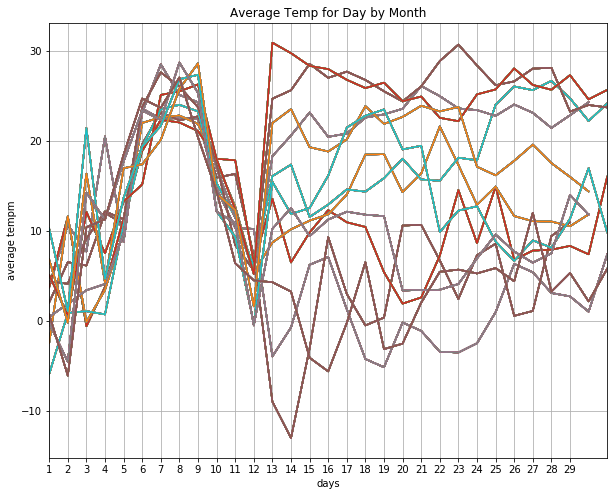

In [46]:
weatherplot(df_weather)

This more of less confirms our suspicion that the months and days have been flipped for the days before 12.  In order to fix this, we need to set it so that for entries with a day value of less than 12, the values for day and month switch spots.  So the the day becomes the month, and the month becomes the day

In [47]:
df_weather['month'] = df_weather.pickup_datetime.dt.month
df_weather['day'] = df_weather.pickup_datetime.dt.day
df_weather['time'] = df_weather.pickup_datetime.dt.time

In [48]:
#swap the day and month values
for i, k in df_weather.iterrows():
    if df_weather.loc[i,'day'] <= 12:
        temp = df_weather.loc[i,'month']
        df_weather.loc[i,'month'] = df_weather.loc[i,'day']
        df_weather.loc[i,'day'] = temp

In [49]:
#check one entry to see the swap
df_weather.loc[1038,:]

pickup_datetime    2016-02-05 19:51:00
tempm                             14.4
dewptm                            10.6
hum                                 78
wspdi                                0
visi                                 6
pressurem                       1013.4
precipm                              0
conds                             Haze
fog                                  0
rain                                 0
snow                                 0
hail                                 0
thunder                              0
tornado                              0
month                                5
day                                  2
time                          19:51:00
Name: 1038, dtype: object

In [50]:
#create a new datetime string out of the correct month and day values
df_weather['new_datetime'] = ['2016-' + str(df_weather.loc[i,'month']) + '-' + str(df_weather.loc[i,'day']) + '-' 
                              + str(df_weather.loc[i,'time']) for i in range(len(df_weather))]

In [51]:
#check that the new datetime is correct
df_weather.loc[1038,:]

pickup_datetime    2016-02-05 19:51:00
tempm                             14.4
dewptm                            10.6
hum                                 78
wspdi                                0
visi                                 6
pressurem                       1013.4
precipm                              0
conds                             Haze
fog                                  0
rain                                 0
snow                                 0
hail                                 0
thunder                              0
tornado                              0
month                                5
day                                  2
time                          19:51:00
new_datetime         2016-5-2-19:51:00
Name: 1038, dtype: object

In [52]:
#convert the new_datetime string into a datetime object
df_weather['new_datetime'] = pd.to_datetime(df_weather['new_datetime'])

In [53]:
#sort the data by the new_datetime column
df_weather = df_weather.sort_values(by=['new_datetime'], ascending = True)

In [54]:
#drop the columns we no longer need since we now have the correct datetime
df_weather.drop(columns = ['pickup_datetime', 'month', 'day', 'time'], inplace = True)

In [55]:
df_weather.reset_index(drop = True, inplace = True)

In [56]:
df_weather.rename(columns = {'new_datetime':'pickup_datetime'}, inplace = True)

In [57]:
df_weather.loc[1038,:]

tempm                              7.2
dewptm                            -6.7
hum                                 37
wspdi                              6.9
visi                                10
pressurem                       1017.2
precipm                              0
conds                            Clear
fog                                  0
rain                                 0
snow                                 0
hail                                 0
thunder                              0
tornado                              0
pickup_datetime    2016-02-07 15:51:00
Name: 1038, dtype: object

In [58]:
df_weather.columns

Index(['tempm', 'dewptm', 'hum', 'wspdi', 'visi', 'pressurem', 'precipm',
       'conds', 'fog', 'rain', 'snow', 'hail', 'thunder', 'tornado',
       'pickup_datetime'],
      dtype='object')

In [59]:
df_weather = df_weather[['pickup_datetime', 'tempm', 'dewptm', 'hum', 'wspdi', 'visi', 'pressurem', 
                         'precipm', 'conds', 'fog', 'rain', 'snow',
                         'hail', 'thunder', 'tornado']]

In [60]:
df_weather.head()

,pickup_datetime,tempm,dewptm,hum,wspdi,visi,pressurem,precipm,conds,fog,rain,snow,hail,thunder,tornado
0,2016-01-01 00:51:00,5.6,-3.9,51.0,4.6,10.0,1017.9,0.0,Overcast,0,0,0,0,0,0
1,2016-01-01 01:51:00,5.0,-3.9,53.0,3.5,10.0,1017.8,0.0,Overcast,0,0,0,0,0,0
2,2016-01-01 02:51:00,5.0,-3.3,55.0,4.6,10.0,1017.7,0.0,Overcast,0,0,0,0,0,0
3,2016-01-01 03:51:00,5.0,-3.3,55.0,9.2,10.0,1017.7,0.0,Overcast,0,0,0,0,0,0
4,2016-01-01 04:51:00,4.4,-3.3,58.0,10.4,10.0,1017.0,0.0,Overcast,0,0,0,0,0,0


With the correct dates now in place, this plot is more or less what we would expect a daily weather plot to look like

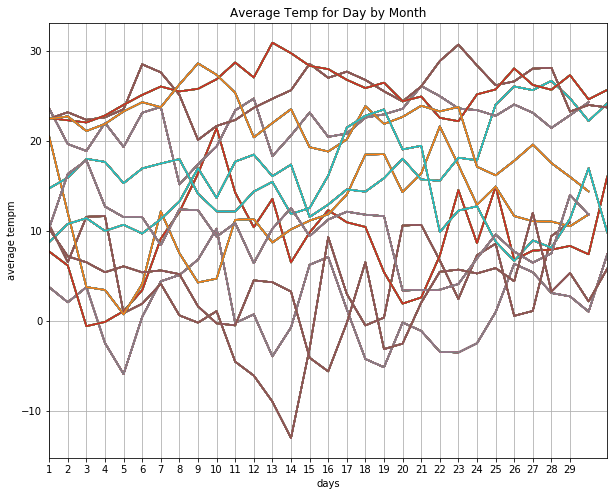

In [61]:
weatherplot(df_weather)

## With the correct dates in place, let's look at the rain, snow, and clear days again

In [62]:
df_weather_grouped = df_weather.groupby([df_weather.pickup_datetime.dt.month, df_weather.pickup_datetime.dt.day])

In [63]:
#create a dataframe of how many measurements of each instance were taken
#one column for rain, one for snow, one for nothing
weatherdate = []
raincount = []
snowcount = []
count = []

#iterate through each day as grouped in df_weather_grouped, adding up the instances of rain, snow, and clear
for month, day in df_weather_grouped:
    weatherdate.append(month)
    rain_total = df_weather_grouped.get_group(month).rain.sum()
    snow_total = df_weather_grouped.get_group(month).snow.sum()
    clear_total = len(df_weather_grouped.get_group(month)) - rain_total - snow_total
    
    raincount.append(df_weather_grouped.get_group(month).rain.sum())
    snowcount.append(df_weather_grouped.get_group(month).snow.sum())
    count.append(clear_total)
    

In [64]:
df_precip_type = pd.DataFrame({'date':weatherdate,'rain':raincount, 'snow':snowcount, 'clear':count})

In [65]:
df_precip_type.head()

,date,rain,snow,clear
0,"(1, 1)",0,0,24
1,"(1, 2)",0,0,24
2,"(1, 3)",0,0,24
3,"(1, 4)",0,0,22
4,"(1, 5)",0,0,22


## Look at the days that it rained

In [66]:
df_rain = df_precip_type[df_precip_type['rain'] != 0]

In [67]:
df_rain_sorted = df_rain.sort_values(by = ['rain'], ascending = False)

In [68]:
df_rain_sorted.head()

,date,rain,snow,clear
333,"(11, 29)",40,0,14
54,"(2, 24)",36,0,35
123,"(5, 3)",33,0,22
300,"(10, 27)",33,0,16
9,"(1, 10)",28,0,18


## Look at the days that it snowed

In [69]:
df_snow = df_precip_type[df_precip_type['snow'] != 0]

In [70]:
df_snow_sorted = df_snow.sort_values(by = ['snow'], ascending = False)

In [71]:
df_snow_sorted.head()

,date,rain,snow,clear
22,"(1, 23)",0,44,1
63,"(3, 4)",0,35,21
35,"(2, 5)",1,24,19
80,"(3, 21)",0,21,20
79,"(3, 20)",0,17,20


## Look at the days with neither rain or snow, ie clear

In [72]:
df_clear = df_precip_type[(df_precip_type['rain'] == 0) & (df_precip_type['snow'] == 0)]

In [73]:
df_clear_sorted = df_clear.sort_values(by = ['clear'], ascending = False)

In [74]:
df_clear_sorted.head(10)

,date,rain,snow,clear
183,"(7, 2)",0,0,71
127,"(5, 7)",0,0,43
276,"(10, 3)",0,0,37
191,"(7, 10)",0,0,35
250,"(9, 7)",0,0,35
125,"(5, 5)",0,0,34
243,"(8, 31)",0,0,33
83,"(3, 24)",0,0,31
275,"(10, 2)",0,0,31
361,"(12, 27)",0,0,31


In [75]:
df_weather.head()

,pickup_datetime,tempm,dewptm,hum,wspdi,visi,pressurem,precipm,conds,fog,rain,snow,hail,thunder,tornado
0,2016-01-01 00:51:00,5.6,-3.9,51.0,4.6,10.0,1017.9,0.0,Overcast,0,0,0,0,0,0
1,2016-01-01 01:51:00,5.0,-3.9,53.0,3.5,10.0,1017.8,0.0,Overcast,0,0,0,0,0,0
2,2016-01-01 02:51:00,5.0,-3.3,55.0,4.6,10.0,1017.7,0.0,Overcast,0,0,0,0,0,0
3,2016-01-01 03:51:00,5.0,-3.3,55.0,9.2,10.0,1017.7,0.0,Overcast,0,0,0,0,0,0
4,2016-01-01 04:51:00,4.4,-3.3,58.0,10.4,10.0,1017.0,0.0,Overcast,0,0,0,0,0,0


## Save the dataframe to a csv file

In [76]:
df_weather.to_csv('weather_edit.csv', index = False)